### homework (important sampling)

1. Calculate $\gamma = \int_0^{1}g(x)dx$ with $g(x)=x^{10}.$

(1). Generate $X,Y,Z,W$ whose CDFs are $1,F_Y(x)=x^5,F_Z(x)=x^{10},F_W(x)=x^{15},x\in[0,1]$, respectively.

(2). Assume that their pdfs of $X,Y,Z,W$ in (1) are $f_X,f_Y,f_Z,f_W,$ respectively. 

Consider the following method to calculate $\gamma:$
\begin{equation}
   \int_0^1 g(x)dx = \int_0^1 \frac{g(x)}{f(x)}f(x)dx = \mathbb{E}_{X\sim f(x)}\frac{g(X)}{f(X)}.
\end{equation}

Compare average and standard deviation of $\{\gamma_n^{(k)}-\gamma:k=1,\cdots,30\},$ where $\gamma_n^{(k)}$ calculated by four distributions sampling with $n=500,2000,8000,32000$ for $k$-th repetition.

(3) What is your conclusion about (2).

2. Write Python code to calculate $\int_{\mathcal{D}}f(x,y)dxdy,$ where $f(x,y)=\cos(e^{xy^2})e^{x^2\sin (y)}+xy\log(|x|+2)$ and $\mathcal{D}=\{(x,y):x^2+|x|y^2\le 1~\text{and}~x^4/9+(xy)^2\le 5\}.$ 

True value of gamma: 0.09090909090909093


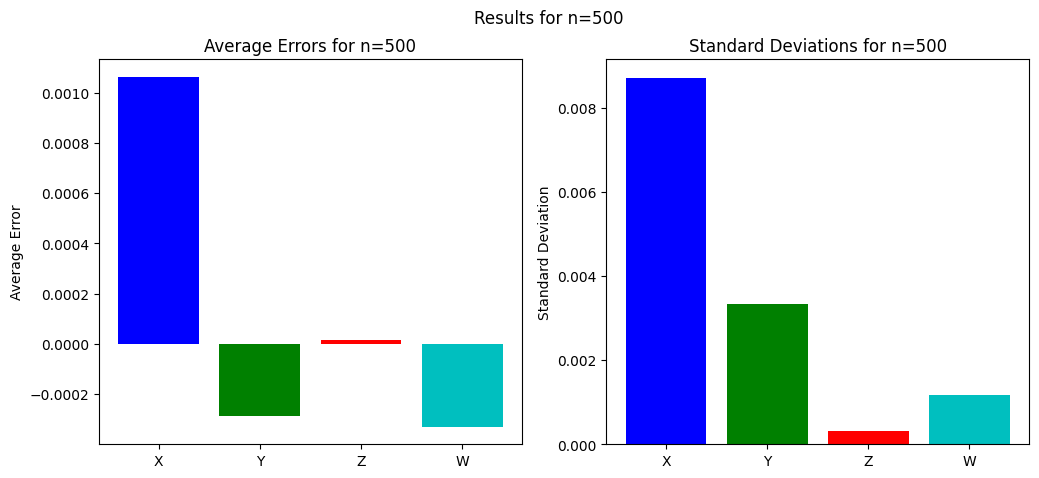

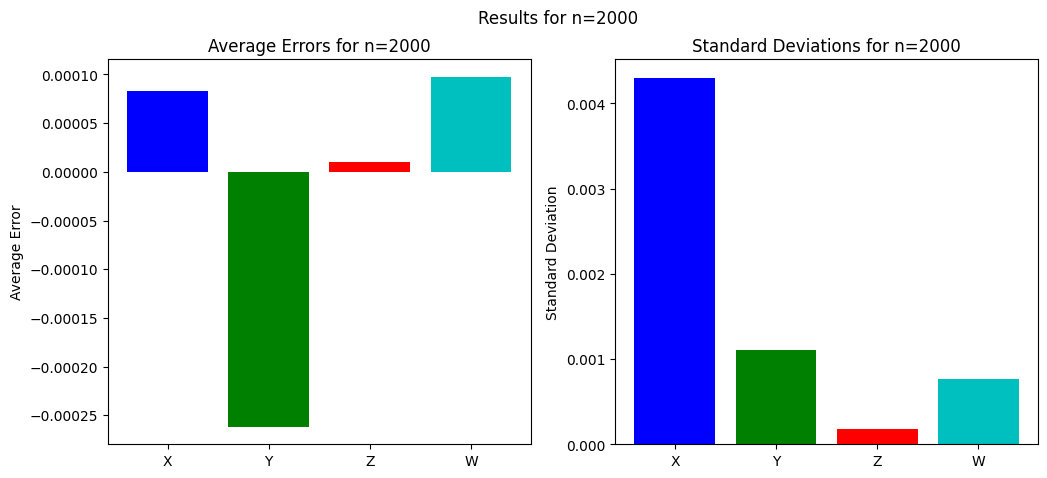

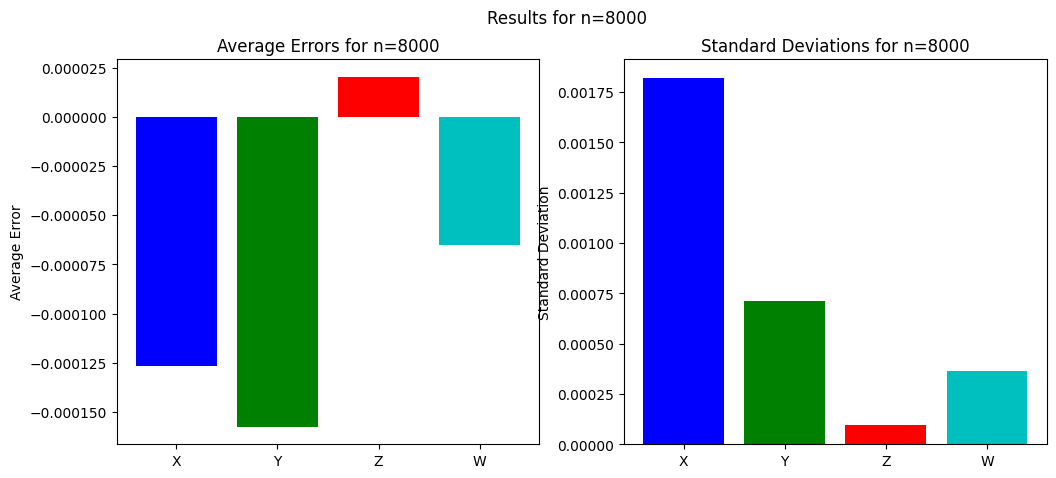

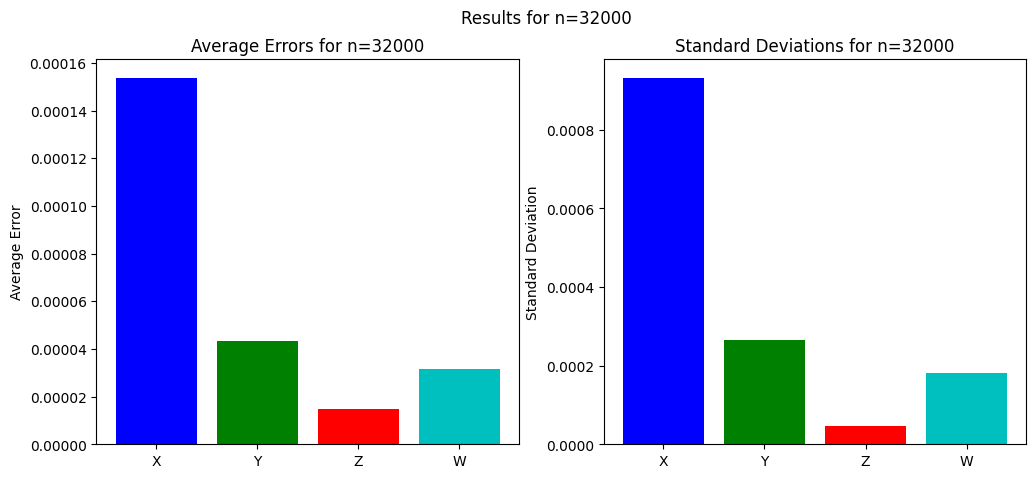


Conclusion:
As the number of samples (n) increases, the average error and standard deviation tend to decrease for all distributions.
The distribution Z, whose PDF matches the form of g(x) more closely, generally provides more stable and accurate estimates.


In [1]:
# Importance Sampling
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def g(x):
    return x ** 10

gamma_true, _ = integrate.quad(g, 0, 1)
print(f"True value of gamma: {gamma_true}")

n_values = [500, 2000, 8000, 32000]
repetitions = 30

def sample_Y(size):
    return np.random.uniform(0, 1, size) ** (1 / 5)

def sample_Z(size):
    return np.random.uniform(0, 1, size) ** (1 / 10)

def sample_W(size):
    return np.random.uniform(0, 1, size) ** (1 / 15)

# Define PDF functions
def f_X(x):
    return np.ones_like(x)

def f_Y(x):
    return 5 * x ** 4

def f_Z(x):
    return 10 * x ** 9

def f_W(x):
    return 15 * x ** 14

# Monte Carlo
def estimate_gamma(g, f, samples):
    return np.mean(g(samples) / f(samples))

average_errors = {}
std_devs = {}

for n in n_values:
    errors_X, errors_Y, errors_Z, errors_W = [], [], [], []
    
    for _ in range(repetitions):
        # Sample from distributions
        X_samples = np.random.uniform(0, 1, n)
        Y_samples = sample_Y(n)
        Z_samples = sample_Z(n)
        W_samples = sample_W(n)
        
        # Estimate gamma for each distribution
        gamma_X = estimate_gamma(g, f_X, X_samples)
        gamma_Y = estimate_gamma(g, f_Y, Y_samples)
        gamma_Z = estimate_gamma(g, f_Z, Z_samples)
        gamma_W = estimate_gamma(g, f_W, W_samples)
        
        # Calculate error
        errors_X.append(gamma_X - gamma_true)
        errors_Y.append(gamma_Y - gamma_true)
        errors_Z.append(gamma_Z - gamma_true)
        errors_W.append(gamma_W - gamma_true)
    
    # Store average and standard deviation of errors
    average_errors[n] = [
        np.mean(errors_X), np.mean(errors_Y), np.mean(errors_Z), np.mean(errors_W)
    ]
    std_devs[n] = [
        np.std(errors_X), np.std(errors_Y), np.std(errors_Z), np.std(errors_W)
    ]

labels = ['X', 'Y', 'Z', 'W']
for i, n in enumerate(n_values):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(labels, average_errors[n], color=['b', 'g', 'r', 'c'])
    plt.title(f'Average Errors for n={n}')
    plt.ylabel('Average Error')
    
    plt.subplot(1, 2, 2)
    plt.bar(labels, std_devs[n], color=['b', 'g', 'r', 'c'])
    plt.title(f'Standard Deviations for n={n}')
    plt.ylabel('Standard Deviation')
    
    plt.suptitle(f'Results for n={n}')
    plt.show()

print("\nConclusion:")
print("As the number of samples (n) increases, the average error and standard deviation tend to decrease for all distributions.")
print("The distribution Z, whose PDF matches the form of g(x) more closely, generally provides more stable and accurate estimates.")

In [2]:
# Double Integral
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.cos(np.exp(x * y**2)) * np.exp(x**2 * np.sin(y)) + x * y * np.log(np.abs(x) + 2)

def in_domain(x, y):
    condition1 = x**2 + np.abs(x) * y**2 <= 1
    condition2 = (x**4 / 9) + (x * y)**2 <= 5
    return condition1 and condition2

# Monte Carlo Integration
np.random.seed(42)  

x_min, x_max = -2, 2
y_min, y_max = -2, 2

num_points = 1000000

x_random = np.random.uniform(x_min, x_max, num_points)
y_random = np.random.uniform(y_min, y_max, num_points)
in_domain_mask = [in_domain(x, y) for x, y in zip(x_random, y_random)]
in_domain_points = np.sum(in_domain_mask)

f_values = f(x_random[in_domain_mask], y_random[in_domain_mask])

area_bounding_box = (x_max - x_min) * (y_max - y_min)

# Monte Carlo estimate 
integral_estimate = area_bounding_box * np.mean(f_values)

print(f"Estimated value of the integral: {integral_estimate}")

Estimated value of the integral: 7.77107003907481
